# <center> PySensCraft - Visualizations
<br/>

**Note**: *this notebook was created for the purpose of providing an example usage of the graphs available in the library. For in-depth sensitivity analysis guide see* `examples.ipynb`

<br/>

In [25]:
## Necessary imports for the notebook to work
import numpy as np
import matplotlib.pyplot as plt
from pysenscraft import ranking, graphs

<br/>

### **Table of contents:**
1. [Alternative submodule](#1)
1. [Promotion-demotion ranking graph](#2)
1. [Preference distribution](#3)
1. [Rankings distribution](#3)
1. [Values distribution](#3)
1. [Weights barplot](#3)

<a id="1"></a><br/>
## 1. Heatmap

The main usage of the heatmap is for visualization of the fuzzy ranking approach

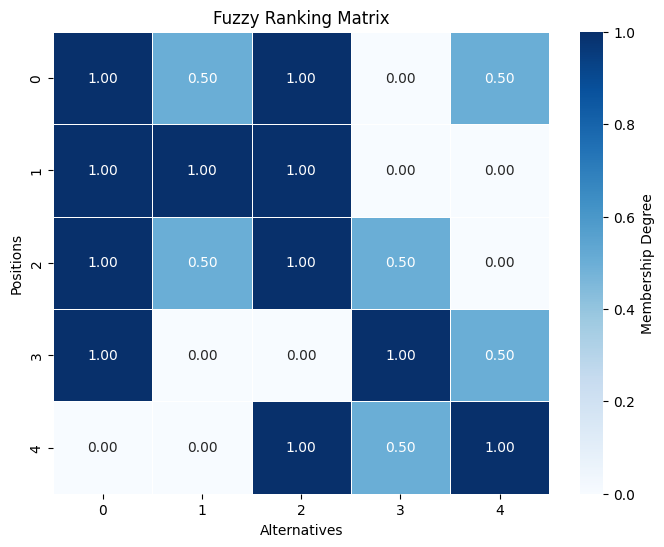

In [11]:
rankings = np.array([
    [1, 2, 3, 4, 5],
    [2, 1, 5, 3, 4],
    [4, 3, 2, 5, 1],
    [3, 2, 1, 4, 5],
])
fuzzy_ranking = ranking.fuzzy_ranking(rankings, normalization_axis=0)
graphs.heatmap(fuzzy_ranking)
plt.show()

However to the heatmap function can be passed any array that contains different values in form of a matrix. 
- The xlabel, ylabel, title and color bar label can be overriden.
- figsize can be specified

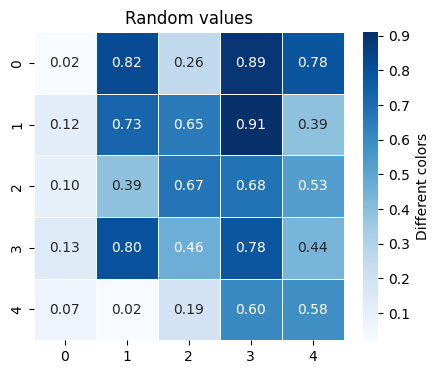

In [24]:
random_values = np.random.random((5, 5))
cbar_kwargs = {
    'label': 'Different colors'
}
graphs.heatmap(random_values, title='Random values', xlabel='', ylabel='', cbar_kwargs=cbar_kwargs, figsize=(5, 4))
plt.show()

It is possible to create figure before heatmap call and passing ax on which plot should be drawn. ax is returned from function if further changes are necessary.

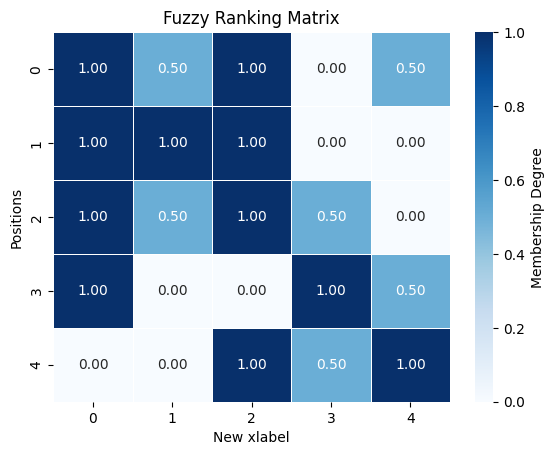

In [22]:
fig, ax = plt.subplots()
ax = graphs.heatmap(fuzzy_ranking, ax=ax)
ax.set_xlabel('New xlabel')
plt.show()

#### **Other parameters**:
- `cmap` - changes color map used by heatmap
- `annotate` - controls wether numbers on heatmap cells should be shown
- `fmt` - controls how numbers on heatmap cells should be formatted
- `linewidths` - controls the width of lines separating heatmap cells
- `label_fontsize` - controls label font size
- `title_fontsize` - controls title font size

<a id="2"></a><br/>
## 2. Promotion-demotion ranking graph

<a id="3"></a><br/>
## 3. Preference distribution

<a id="4"></a><br/>
## 4. Rankings distribution

<a id="5"></a><br/>
## 5. Values distribution

<a id="6"></a><br/>
## 6. Weights barplot